<a href="https://colab.research.google.com/github/YuliaMeshcheryakova/cmpAL/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B51_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
from IPython.display import display, Math
import numpy as np

Определяем функцию для создания узла дерева для хранения целых чисел

In [399]:
def integer_(x: int) -> tuple:
  return 'integer', {'value': x}

a = integer_(-34)
a

('integer', {'value': -34})

ID(x) - возвращает идентификатор узла

items(x) - возвращает список дочерних узлов

options(x) - возвращает словарь с параметрами узла

isTerminal(x) - возвращает True, если узел --- лист, т.е. не содержит дочерних узлов

In [400]:
def ID(x: tuple) -> str:
  return x[0]

def items(x: tuple) -> list:
  return x[1 :-1]

def options(x: tuple) -> dict:
  return x[-1]

def isTerminal(x: tuple) -> bool:
  return len(items(x))==0

ID(a), items(a), options(a), isTerminal(a)

('integer', (), {'value': -34}, True)

Определяем функции для преобразования узла в LaTeX-выражение

In [401]:
def latex_(x: tuple) -> str:
  cmd = eval(f"latex_{ID(x)}")
  return cmd(x)

def latex_integer(x: tuple) -> str:
  return f"{options(x)['value']}"

latex_(a)

'-34'

Определяем функцию show_ для визуализации формулы, представленной деревом x

In [402]:
def show_(x: tuple) -> None:
  display(Math(latex_(x)))

show_(integer_(-123))
print(-123)

<IPython.core.display.Math object>

-123


In [403]:
def symbol_(x: str) -> tuple:
  greek = ['alpha', 'beta', 'gamma','delta', 'epsilon', 'zeta', 'eta', 'theta',
           'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'o', 'pi', 'rho', 'sigma',
           'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega',
           'A', 'B', 'Gamma', 'Delta', 'varepsilon', 'Epsilon', 'Z', 'H', 'vartheta', 'Theta',
           'I', 'K', 'Lambda', 'M', 'N', 'Xi', 'O', 'Pi', 'varrho', 'P', 'Sigma',
           'T', 'Upsilon', 'varphi', 'Phi', 'X', 'Psi', 'Omega']
  n, s = x.split('_') if '_' in x else (x, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'symbol', {'name': x, 'latex': n}

def latex_symbol(x: tuple) -> str:
  return options(x)['latex']

x, alpha = symbol_('x_1'), symbol_('alpha')
show_(x)
show_(alpha)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [404]:
def add_(x: tuple, y: tuple) -> tuple:
  return 'add', x, y, {}

def sub_(x: tuple, y: tuple) -> tuple:
  return 'sub', x, y, {}

def mul_(x: tuple, y: tuple) -> tuple:
  return 'mul', x, y, {}

def div_(x: tuple, y: tuple) -> tuple:
  return 'div', x, y, {}

def deg_(x: tuple, y: tuple) -> tuple:
  return 'deg', x, y, {}

def and_(x: tuple, y: tuple) -> tuple:
  return 'and', x, y, {}

def or_(x: tuple, y: tuple) -> tuple:
  return 'or', x, y, {}

def xor_(x: tuple, y: tuple) -> tuple:
  return 'xor', x, y, {}

def eq_(x: tuple, y: tuple) -> tuple:
  return 'eq', x, y, {}

def ne_(x: tuple, y: tuple) -> tuple:
  return 'ne', x, y, {}

def lt_(x: tuple, y: tuple) -> tuple:
  return 'lt', x, y, {}

def le_(x: tuple, y: tuple) -> tuple:
  return 'le', x, y, {}

def gt_(x: tuple, y: tuple) -> tuple:
  return 'gt', x, y, {}

def ge_(x: tuple, y: tuple) -> tuple:
  return 'ge', x, y, {}

def neg_(x: tuple) -> tuple:
  return 'neg', x, {}

def inv_(x: tuple) -> tuple:
  return 'inv', x, {}

In [405]:
a = integer_(34)
x = symbol_('x')
y = symbol_('y')
f = mul_(add_(a, x), y)
print(f)

('mul', ('add', ('integer', {'value': 34}), ('symbol', {'name': 'x', 'latex': 'x'}), {}), ('symbol', {'name': 'y', 'latex': 'y'}), {})


In [406]:
priority = {'deg': 9, 'neg': 8, 'inv': 8, 'mul': 7, 'div': 7, 'add' : 6,'sub' : 6, 'and': 5, 'xor': 4, 'or': 3, 'eq': 2, 'ne': 2, 'lt': 2, 'le': 2, 'gt': 2, 'ge': 2}

def Pr(x: tuple) -> int:
  return priority.get(ID(x), 10)

print(Pr(f))

7


In [407]:
def enclose(x: str) -> str:
  return f"\\left( {x} \\right)"

In [408]:
def latex_add(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} + {{{b}}}"

def latex_mul(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \\cdot {{{b}}}"

def latex_div(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  return f"\\frac{{{a}}}{{{b}}}"

def latex_sub(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or ((not isinstance(options(x[2]),tuple)) and options(x[2]).get('value', 1) < 0) or ID(x[2]) == 'neg':
    b = enclose(b)
  return f"{{{a}}} - {{{b}}}"

def latex_deg(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x) or x[1][0] == 'rational':
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}}^{{{b}}}"

def latex_inv(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1)<0 or ID(x[1])=='neg':
    a = enclose(a)
  return f"\\neg {{{a}}}"

def latex_neg(x: tuple) -> str:
  a = latex_(x[1])
  if (isinstance(options(x[1]).get('value', 1), int) and options(x[1]).get('value', 1) < 0) or ID(x[1]) == 'neg':
    a = enclose(a)
  return f" -{{{a}}}"

def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \wedge {{{b}}}"

def latex_or(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{{{a}}} \vee {{{b}}}"

def latex_xor(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x)or options(x[2]).get('value', 1)<0 or ID(x[2])=='neg':
    b = enclose(b)
  return f"{a} \oplus {b}"

def latex_eq(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} = {{{b}}}"

def latex_ne(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\neq {{{b}}}"

def latex_lt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} < {{{b}}}"

def latex_le(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\leq {{{b}}}"

def latex_gt(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} > {{{b}}}"

def latex_ge(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\geq {{{b}}}"

In [409]:
a = integer_(34)
y = integer_(10)
x = symbol_('x')
f = mul_(add_(a, y), y)
show_(f)

show_(neg_(integer_(-11)))
show_(deg_(x, integer_(-1)))
show_( div_(mul_(add_(a, y), y), neg_(y)))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [410]:
class Expression:
  def __init__(self, x):
    self.T = x

  def __add__(self, x):
    return Expression(add_(self.T, fix(x).T))

  def __sub__(self, x):
    return Expression(sub_(self.T, fix(x).T))

  def __mul__(self, x):
    return Expression(mul_(self.T, fix(x).T))

  def __truediv__(self, x):
    return Expression(div_(self.T, fix(x).T))

  def __pow__(self, x):
      return Expression(deg_(self.T, fix(x).T))

  def __and__(self, x):
    return Expression(and_(self.T, fix(x).T))

  def __or__(self, x):
    return Expression(or_(self.T, fix(x).T))

  def __xor__(self, x):
    return Expression(xor_(self.T, fix(x).T))

  def __eq__(self, x):
    return Expression(eq_(self.T, fix(x).T))

  def __ne__(self, x):
    return Expression(ne_(self.T, fix(x).T))

  def __lt__(self, x):
    return Expression(lt_(self.T, fix(x).T))

  def __le__(self, x):
    return Expression(le_(self.T, fix(x).T))

  def __gt__(self, x):
    return Expression(gt_(self.T, fix(x).T))

  def __ge__(self, x):
    return Expression(ge_(self.T, fix(x).T))

  def __invert__(self):
    return Expression(inv_(fix(self).T))

  def __neg__(self):
    return Expression(neg_(fix(self).T))

  def __radd__(self, x):
    return Expression(add_(fix(x).T, self.T))

  def __rsub__(self, x):
    return Expression(sub_(fix(x).T, self.T))

  def __rmul__(self, x):
    return Expression(mul_(fix(x).T, self.T))

  def __rtruediv__(self, x):
    return Expression(div_(fix(x).T, self.T))

  def __rpow__(self, x):
    return Expression(deg_(fix(x).T, self.T))

  def __rand__(self, x):
    return Expression(and_(fix(x).T, self.T))

  def __ror__(self, x):
    return Expression(or_(fix(x).T, self.T))

  def __rxor__(self, x):
    return Expression(xor_(fix(x).T, self.T))

  def __hash__(self):
    return hash(str(self.T))

def fix(x):
  if isinstance(x, int):
    return Expression(integer_(x))
  return x



Создаем обертки для функций integer_ и symbol_
опциональное (бонусное) задание: напишите функцию symbols, которая позволяет создавать сразу несколько символьных переменных: x, y, z = symbols('x y z')

In [411]:
def Z(x: int) -> Expression:
  return Expression(integer_(x))

def symbol(x: str) -> Expression:
  return Expression(symbol_(x))

def symbols(x: str) -> Expression:
  a = x.split()
  for i in range(len(a)):
     a[i] = Expression(symbol_(a[i]))
  return a

Определяем функцию show вывода выражений, заданных классом Expression
протестируйте работу всех функций на различных выражениях

In [412]:
def show(x: Expression) -> None:
  show_(x.T)

In [413]:
a, x = Z(13), symbol('x_2')

show(a / x ** a)

<IPython.core.display.Math object>

<ipython-input-414-1e3c6b446c2a>:24: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


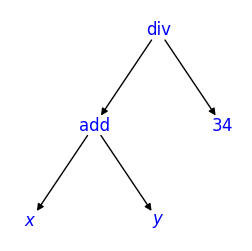

In [414]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.readwrite import json_graph

def makeGraph(x: tuple, nodes: list, labels: list, links: list) -> int:
  id_ = len(nodes)
  nodes.append({'id': id_})
  if isTerminal(x):
    labels[id_] = f'${latex_(x)}$'
  else:
    labels[id_] = x[0]
    for a in x[1:]:
      if isinstance(a, tuple):
        cid = makeGraph(a, nodes, labels, links)
        links.append({'source': id_, 'target': cid})
  return id_

def drawGraph_(x: tuple, size) -> None:
  nodes, labels, links = [], {}, []
  makeGraph(x, nodes, labels, links)
  graph = json_graph.node_link_graph({'nodes': nodes, 'links': links}, directed=True, multigraph=False)
  pos = graphviz_layout(graph, prog="dot")
  fig, ax = plt.subplots(figsize=(3 * size, 3 * size))
  ax.set_axis_off()
  nx.draw_networkx_edges(graph.to_directed(), pos, ax = ax, edge_color="black")
  nx.draw_networkx_labels(graph.to_directed(), pos, labels = labels, font_color = "blue")

def drawGraph(x: Expression, size: float = 1) -> None:
  drawGraph_(x.T, size)

x, y = symbol('x'), symbol('y')
drawGraph((x + y) / Z(34))

# Часть 2


### Факторизация

* Напишите функцию `factors(x)`, которая возвращает разложение заданного натурального числа $x$ на простые множители в виде списка этих множителей: factors`(12)` $\to$ `[2, 2, 3]`.

In [415]:
def factors(x: int) -> list:
  mn = []
  k = 2
  while x != 1:
    if x % k == 0:
      mn.append(k)
      x//=k
    else:
      k += 1
  return mn
factors(7007)

[7, 7, 11, 13]

* Напишите функцию `factorizeInt(x)`, которая преобразует заданное число `x` в произведение простых сомножителей в форме **выражения** (класс `Expression`), повторяющиеся сомножители должны входить в выражение в форме степеней: `factorizeInt(120)` $\to 2^3\cdot 3\cdot 5$.

In [416]:
def factorizeInt(x: int) -> Expression:
  mn1 = factors(x)
  mn2 =[mn1[0]]
  for i in range(len(mn1)):
    if not mn1[i] in mn2:
      mn2.append(mn1[i])

  k = Z(mn2[0])
  s1 = mn1.count(mn2[0])
  if s1 > 1:
    k **= mn1.count(mn2[0])
  for i in range(1, len(mn2)):
    s2 = mn1.count(mn2[i])
    if s2 > 1:
      k *= Z(mn2[i])**Z(s2)
    else:
      k *= Z(mn2[i])

  return k

show(factorizeInt(360))

<IPython.core.display.Math object>

In [417]:
a1 = Z(2) **Z(3)
a1 *= Z(3) **Z(5)
show(a1)

<IPython.core.display.Math object>

### Наибольший общий делитель

* Реализуйте алгоритм Евклида в виде функции `GCD(n, m)`.

In [418]:
def GCD(n: int, m: int) -> int:
  while m > 0:
    n, m = m, n % m
  return n

GCD(120, 48)

24

### Реализация рациональных чисел

* Создаем функцию-конструктор `rational_(n,m)` узлов для рациональных чисел. В каждом таком узле должно храниться нормализованное представление заданного числа.

In [419]:
def rational_(n: int, m: int) -> tuple:
  if n == 0:
    m = 1 # нормализованное представление нуля - (0, 1)
  else:
    if m < 0:
      n, m = -n, -m # знаменатель должен быть положительным
    c = GCD(abs(n), m)
    n, m = n // c, m // c # приводим дробь к несократимому виду
  return 'rational', {'num': n, 'denom': m} # num - числитель (numerator), denom - знаменатель (denominator)

* Пишем функцию `Q(n,m)` для создания выражения, представляющего рациональное число $n/m$. Знаменатель `m` по умолчанию равен `1`.

In [420]:
def Q(n: int, m: int = 1) -> Expression:
  return Expression(rational_(n, m))

Q(2, -6).T

('rational', {'num': -1, 'denom': 3})

* Напишите функцию `latex_rational(x)`, преобразующую рациональное число $x$ в формат LaTeX. Это преобразование должно учитывать, является ли число целым (единичный знаменатель не используется), для отрицательных чисел знак минус ставится перед числом, а не в числителе:
`Q(0, 5)` $\to 0$, `Q(6, -2)` $\to 3$, `Q(6, 8)` $\to \dfrac{3}{4}$, `Q(-15, 25)` $\to -\dfrac{3}{5}$.

In [421]:
def latex_rational(x: tuple) -> str:
  n, m = options(x)['num'], options(x)['denom']
  if m == 1:
    return f"{{{int(n/m)}}}"
  if n < 0:
    return f"-{{\\frac{{{abs(n)}}}{{{m}}}}}"
  else:
    return f"\\frac{{{abs(n)}}}{{{m}}}"


show(Q(0, 5))
show(Q(6, -2))
show(Q(6, 8))
show(Q(-15, 25))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем, что рациональные числа могут быть теперь использованы для построения арифметический выражений

In [422]:
show((1 + Q(6, 4)) / (Q(152, 24) ** 2 * Q(5, 7)))

<IPython.core.display.Math object>

### Цепные дроби

* Напишите функцию `continuedTerms(n,m)`, которая преобразует заданное рациональное число $n/m$ в цепную дробь \[$a_0$; $a_1$, $a_2$, ...\] и возвращает результат в виде списка: `continuedTerms(15,11)` $\to$ `[1,2,1,3]`.

In [423]:
def continuedTerms(n: int, m: int) -> list:
  an = []
  while m > 0:
    an.append(n // m)
    n, m = m, n % m
  return an

continuedTerms(15, 11)

[1, 2, 1, 3]

* Напишите функцию, которая строит выражение, представляющее цепную дробь, в виде объекта класса `Expression`.

In [424]:
def continuedFraction(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom'] # предполагаем, что p - рациональное число!
  A = continuedTerms(n, m) # находим элементы цепной дроби
  ex = Z(A[-1])
  for i in range(-2, -(len(A) + 1), -1):
    ex = A[i] + 1 / ex
  return ex

show(continuedFraction(Q(15, 11)))

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `float2continued(x,n)`, преобразующую заданное действительное число $x$ в цепную дробь "глубины" $n$: `float2continued(np.sqrt(2),4)` $\to 1 + \frac1{2+\frac1{2+\frac1{2}}}$

In [425]:
import math

def float2continued(x: float, n: int) -> Expression:
  k = 0
  an = []
  while k < n + 1:
    an.append(math.floor(x))
    x = 1 / (x - an[k])
    k = k + 1

  ex = Z(an[-1])
  for i in range(-2, -len(an), -1):
    ex = an[i] + 1 / ex
  return ex

show(float2continued(np.pi, 5))
show(float2continued(np.sqrt(2), 5))
show(float2continued(np.exp(1), 5))
show(float2continued((np.sqrt(5)+1)/2, 5))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Египетские дроби

* Напишите функцию `egyptianTerms(n,m)` разложения заданного рационального числа $n/m$ (в предположении $n < m$) в египетскую дробь, возвращающую список знаменателей найденных простых дробей: `egyptianTerms(7, 8)` $\to$ `[2, 3, 24]`.

In [426]:
import math

def egyptianTerms(n: int, m: int) -> list:
  an = []
  while n > 0:
    a = math.ceil(m/n)
    n, m = (-m) % n, m * a
    an.append(a)
  return an

egyptianTerms(7, 8)

[2, 3, 24]

* Напишите функцию, которая строит выражение, представляющее египетскую дробь, в виде объекта класса `Expression`: `egyptianSum(7,8)` $\to \frac12 + \frac13 + \frac1{24}$.

In [427]:
def egyptianSum(p: Expression) -> Expression:
  n, m = options(p.T)['num'], options(p.T)['denom']
  A = egyptianTerms(n, m)
  ex = 1 / Z(A[0])
  for i in range(1, len(A)):
    ex +=  1 / Z(A[i])
  return ex

show(egyptianSum(Q(7, 8)))

<IPython.core.display.Math object>

### Частичное оценивание арифметических выражений

В большинстве систем КА выражения, заданные пользователем, сразу же упрощаются, в частности, в них вычисляется все, что может быть вычислено.
В частности, если выражение является арифметическим и содержит только целые и рациональные числа, то это выражение преобразуется в рациональное число, например: $$\frac{\frac12+\frac23}{5}\to\frac7{30}.$$
Определим несколько функций, предназначенных для такого оценивания (evaluating) арифметических выражений над целыми и рациональными числами.

* Головная функция `evaluate(x)` оценивает выражение, заданное пользователем в виде объекта класса `Expression`, и возвращает выражение того же самого типа (класса), вызывая внутреннюю функцию `eval_` оценивания выражения в *списочном* формате.

In [428]:
def evaluate(x: Expression) -> Expression:
  return Expression(eval_(x.T))

* Функция `eval_(x)` “пытается” вызвать обработчик соответствующего узла, и если такой обработчик есть, то возвращается результат его работы.
Если обработчика нет (срабатывает исключение), то возвращается исходный узел.

In [429]:
def eval_(x: tuple) -> tuple:
  try:
    cmd = eval(f"eval_{ID(x)}") # конструируем функцию оценивания текущего узла по его ID
    return cmd(x)
  except (NameError, BaseException):
    return x # возвращаем исходный узел, если обработчик не найден

* Для упрощения выполнения арифметических операций над объектами разной природы (числа разных классов, многочлены, матрицы) определим набор функций для автоматического преобразования типов (cast).
Головная функция `cast` пытается вызвать подходящий обработчик, исходя из идентификатора типа и целевого типа.

In [430]:
def cast_(x: tuple, target: str) -> tuple:
  if ID(x) == target:
    return x # преобразование не нужно, узел x уже имеет правильный тип
  try:
    cmd = eval(f"cast_{ID(x)}_{target}") # конструируем функцию преобразования
    return cmd(x)
  except NameError:
    return x # возвращаем исходный узел, если обработчик не найден

* Реализуем один конкретный преобразователь `cast_integer_rational(x)`, который переводит целое число $x$ в формат рационального числа.

In [431]:
def cast_integer_rational(x: tuple) -> tuple:
  n = options(x)['value']
  return rational_(n, 1)

cast_integer_rational(integer_(5))

('rational', {'num': 5, 'denom': 1})

* Теперь можно создавать функции, выполняющие арифметические операции над целыми и рациональными числами. Определим две функции сложения. Имя каждой такой функции должно состоять из типа операции и списка типов операндов, разделенных знаком подчеркивания: `add_integer_integer` складывает два целых числа.

In [432]:
def add_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n + m)

def add_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb + nb * ma, ma * mb
  return rational_(n, m)

* Создадим словарь `OPERATIONS`, в котором будут перечисляться все обработчики каждой бинарной и унарной операций, подлежащих оцениванию. Ключами записей будут типы операций, значениями - списки соответствующих обработчиков.

In [433]:
OPERATIONS = {'add': ['add_integer_integer', 'add_rational_rational']}

* Создаем универсальный обработчик (оцениватель) бинарных операций `eval_binary(op,x,y)`, который просматривает список всех имеющихся обработчиков заданной операции `op`, для каждого из них пытается преобразовать заданные операнды `x` и `y` к соответствующим типам, если преобразование проходит успешно, то вызывает этот обработки и возвращает его результат. Если ни один из обработчиков не срабатывает, то возвращается исходное выражение.   

In [434]:
def eval_binary(op: str, x: tuple, y: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx, idy = fop.split('_')[1:]
    a = cast_(x, idx)
    b = cast_(y, idy)
    if ID(a) == idx and ID(b) == idy:
      cmd = eval(f"{fop}")
      return cmd(a, b)
  return op, x, y

* Наконец, пишем оцениватель `eval_add` операции сложения, который оценывает (рекурсивно) свои операнды и вызывает универсальный обработчик `eval_binary`. Проверяем его работу. Объясните, почему не происходит оценивания в последнем примере!

In [435]:
def eval_add(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) + Q(1, 3)))
x = symbol('x')
show(evaluate(Z(2) + Z(5) + x))
show(evaluate(x + Z(2) + Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Чтобы добавить в систему обработку новых операций (например, операции умножения), нужно 1) создать соответствующие исполнители (умножение целых чисел, умножение рациональных чисел); 2) включить эти исполнители в словарь `OPERATIONS`; 3) написать обработчик соответствующего узла (`eval_mul`), если эта операция бинарная, то в данном обработчике должна вызываться функция `eval_binary`. Для примера добавим в систему оценивание операции умножения.

In [436]:
def mul_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n * m)

def mul_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return rational_(n, m)

OPERATIONS |= {'mul': ['mul_integer_integer', 'mul_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_mul(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) * Z(5)))
show(evaluate(Z(2) * Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте по этой же схеме оценивание операций вычитания и деления целых и рациональных чисел. Учтите, что при делении двух целых чисел может получиться целое число: $6/3 \to 2$, а может - рациональное: $12/8$ $\to \frac{3}{2}$.

In [437]:
# вычитание

def sub_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return integer_(n - m)

def sub_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb - nb * ma , ma * mb
  return rational_(n, m)

OPERATIONS |= {'sub': ['sub_integer_integer', 'sub_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_sub(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(2) - Q(2, 7)))

<IPython.core.display.Math object>

In [438]:
# деление

def div_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return rational_(n, m)

def div_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * mb, ma * nb
  return rational_(n, m)

OPERATIONS |= {'div': ['div_integer_integer', 'div_rational_rational']} # расширяем словарь OPERATIONS новым словарем

def eval_div(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) / Z(3)))
show(evaluate(Z(6) / Z(4)))
show(evaluate(Q(5,12) / Q(10,81)))
show(evaluate((Z(6) - Q(1, 2)) / Q(2, 3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание операции возведения в целую степень: `Z(2) ** Z(3)` $\to 8$, `Z(2) ** Z(-3)` $\to \frac{1}{8}$, `Q(2, 3) ** Z(-2)` $\to \frac{9}{4}$.

In [439]:
def deg_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  if m >= 0:
    return integer_(n ** m)
  else:
    return rational_(1, n ** abs(m))

def deg_rational_integer(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb = options(b)['value']
  n, m = na ** abs(nb), ma ** abs(nb)
  if nb >= 0:
    return rational_(n, m)
  else:
    return rational_(m, n)

OPERATIONS |= {'deg': ['deg_integer_integer', 'deg_rational_integer']} # расширяем словарь OPERATIONS новым словарем

def eval_deg(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(6) ** Z(3)))
show(evaluate(Z(6) ** Z(-2)))
show(evaluate(Q(2, 3) ** Z(-2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание операции возведения в рациональную степень, при условии, что соответствующие корни могут быть извлечены: `Z(8) ** Q(1, 3)` $\to 2$, `Q(4, 9) ** Q(-3, 2)` $\to \frac{27}{8}$. **Но** `Z(4) ** Q(1, 3)` $\to 4^{\frac{1}{3}}$  - операция не может быть оценена.

In [440]:
def deg_integer_rational(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  nb, mb = options(b)['num'], options(b)['denom']
  if (n ** (nb / mb)).is_integer():
    return integer_(int(n ** (nb / mb)))
  else:
    return deg_(a, b)

def deg_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na ** abs(nb / mb), ma ** abs(nb / mb)
  if n.is_integer() and m.is_integer():
    if (nb >= 0):
      return rational_(int(n), int(m))
    else:
      return rational_(int(m), int(n))
  else:
    return  deg_(a, b)

OPERATIONS['deg'] = OPERATIONS['deg'] + ['deg_integer_rational', 'deg_rational_rational']

show(evaluate(Z(25) ** Q(3, 2)))

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте по аналогичной схеме универсальный оцениватель унарных операций `eval_unary` и оцениватель операции `neg` (унарный минус) для целых и рациональных чисел.  

In [441]:
def eval_unary(op: str, x: tuple) -> tuple:
  for fop in OPERATIONS[op]:
    idx = fop.split('_')[1]
    a = cast_(x, idx)
    if ID(a) == idx:
      cmd = eval(f"{fop}")
      return cmd(a)
  return op, x

OPERATIONS |= {'neg': ['neg_integer', 'neg_rational']}

def neg_integer(a: tuple) -> tuple:
  n = options(a)['value']
  return integer_((-1) * n)

def neg_rational(a: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  n, m = na * (-1), ma
  return rational_(n, m)

def eval_neg(x: tuple) -> tuple:
  a = eval_(x[1])
  return eval_unary(ID(x), a)
show(evaluate(-Z(-15)))
show(evaluate(-Q(13, 21)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Часть 3

### Булева логика, константы, операции

* Создаем тип данных для логических констант 1 (true) и 0 (false). Слово bool является ключевым в Python, поэтому используем длинный вариант boolean. Но идентификатор типа будет строка "bool".    

In [442]:
def boolean_(x: bool) -> tuple:
  x = 1 if x else 0
  return 'bool', {'value': x}

def boolean(x: bool) -> Expression:
  return Expression(boolean_(x))

* Напишите функцию преобразования логических констант в формат LaTeX. Чтобы отличать логические 0 и 1 от соответствующих чисел, будем их изображать полужирным шрифтом (см. код этой вкладки): 0 $\to \mathbb{0}$, 1 $\to \mathbb{1}$

In [443]:
def latex_bool(x: tuple) -> str:
  a = options(x)['value']
  return f"\\mathbb{{{a}}}"



* Определяем логические константы I и O

In [444]:
I, O = boolean(True), boolean(False)
show(I + O)
show(Z(1) + Z(0)) # для сравнения - числовые 0 и 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Напишите функции преобразования логических операций and, or, xor, inv в формат LaTeX (см. код этой вкладки):
x∧y,x∨y,x⊕y,x¯¯¯.
Убедитесь, что приоритет этих операций настроен правильно: (x | y) & x  →(x∨y)∧x . Вместо знака конъюнкции  ∧  можно использовать знак умножения  ⋅  (точку).

In [445]:
def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1) < 0 or ID(x[2]) == 'neg':
    b = enclose(b)
  return f"{{{a}}} \\wedge {{{b}}}"

def latex_or(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1) < 0 or ID(x[2]) == 'neg':
    b = enclose(b)
  return f"{{{a}}} \\vee {{{b}}}"

def latex_xor(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1) < 0 or ID(x[2]) == 'neg':
    b = enclose(b)
  return f"{{{a}}} \\oplus {{{b}}}"

def latex_inv(x: tuple) -> str:
  a = latex_(x[1])
  if options(x[1]).get('value', 1) < 0 or ID(x[1]) == 'neg':
    a = enclose(a)
  return f"\\overline{{{a}}}"



* Проверяем:

<IPython.core.display.Math object>

<ipython-input-414-1e3c6b446c2a>:24: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


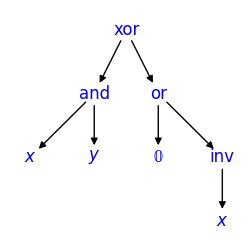

In [446]:
x, y = symbol('x'), symbol('y')
f = x & y ^ (O | ~x)
show(f)
drawGraph(f)

### Оценивание логических выражений

* По аналогии с оценкой арифметических выражений напишите функции оценки всех четырех логических операций. Для оценки бинарных операций используйте написанную ранее функцию `eval_binary`, которая автоматически выполняет поиск нужного оценщика и проводит преобразование типов операндов.

In [447]:
# добавляем "оценщиков" к словарю бинарных операций OPERATIONS
OPERATIONS |= {'and': ['and_bool_bool'], 'or': ['or_bool_bool'], 'xor': ['xor_bool_bool']}

def and_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n & m)

def eval_and(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def or_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n | m)

def eval_or(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def xor_bool_bool(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n ^ m)

def eval_xor(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

* Напишите оцениватель логического отрицания, операция унарная, поэтому все оценивание выполняется внутри одной функции

In [448]:
def eval_inv(x: tuple) -> tuple:
  a = eval_(x[1])
  n = options(a)['value']
  return boolean_(not n)

* Проверяем:

In [449]:
f = (~I | I) ^ (O & I)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `cast_integer_bool` для преобразования целых чисел в логические константы (как в языках C/C++): ноль преобразуется в логический ноль, все остальные числа - в логическую единицу

In [450]:
def cast_integer_bool(x: tuple) -> tuple:
    m = options(x)['value']
    return boolean_(m)

f = Z(2) ^ Z(1) | Z(10)
show(f)
show(evaluate(f))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Таблицы истинности

* Для построения таблицы истинности заданного логического выражения нам потребуется выполнять многократные подстановки в этом выражении каких-то значений вместо имен переменных. Напишем универсальную функцию подстановки `subs` (от английского substitute). Головная `subs` принимает на вход выражение `F` и словарь `V`, ключами в котором являются имена заменяемых переменных, а значениями - выражения, на которые эти переменные будут меняться (см. пример ниже).

* **ВАЖНО!!!** Чтобы объекты типа `Expression` можно было использовать в качестве ключей словаря, они должны быть *хешируемыми*. Т.к. мы переопределили операцию равенство (метод `__eq__` класса `Expression`), то класс стал нехешируемым. Чтобы исправить ситуацию, надо вручную добавить к **вашему определению** класса `Expression` метод `__hash__`, который преобразует наше списочное выражение в строку и вычисляет хеш от полученной строки:

```
class Expression:
  ...

  def __hash__(self):
    return hash(str(self.T))
```

In [451]:
def subs(F: Expression, V: dict) -> Expression:
  # преобразуем словарь V в списочную форму v
  v = {options(k.T)['name']: fix(V[k]).T for k in V}
  # вызываем списочную функцию подстановки
  return Expression(subs_(F.T, v))

def subs_(F: tuple, V: dict) -> tuple:
  # рекурсивная функция
  # если узел - переменная, ищем ее в словаре
  if ID(F) == 'symbol':
    n = options(F)['name']
    if n in V:
      # если переменная есть в словаре, то заменяем ее на соответствующее значение
      return V[n]
    else:
      # иначе оставляем как есть
      return F
  # если узел - не переменная, то рекурсивно вызываем ту же функцию для всех дочерних узлов
  A = [subs_(a, V) for a in items(F)]
  # и возвращаем такой же узел, но с обновленными дочерними поддеревьями
  return ID(F), *A, options(F)

# проверяем

x, y = symbol('x'), symbol('y')
f = x * y
show(f)
g = subs(f, {x: 1 + y ** 2})
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Пишем функцию `makeTable(F: Expression, V: list)` для преобразования заданного логического выражения в таблицу истинности. По числу переменных вычисляем высоту таблицы, делаем цикл по ее строкам. Номер строки представляем в двоичной форме, каждая цифра этого представления подставляется вместо соответствующей переменной в исходное выражение. Полученное константное выражение оценивается и преобразуется в 0 или 1. Из значений переменных и вычисленного значения выражения формируется строка таблицы, например, `000|1`. Выходом функции является список всех строк искомой таблицы истинности.

In [452]:
def makeTable(F: Expression, V: list) -> list:
  n = len(V) # число переменных, определяет высоту таблицы (2^n)
  table = [] # список строк
  for i in range(2 ** n): # цикл по строкам таблицы истинности
    A = ('0' * n + bin(i)[2:])[-n:] # преобразование номера строки в двоичное число в n разрядах, как это работает?
    S = {x: boolean(int(a)) for x, a in zip(V, A)} # словарь для замены
    f = options(evaluate(subs(F, S)).T)['value'] # замена + оценивание + преобразование в цифру 0 или 1
    table.append(f"{A}|{f}") # добавляем строку к таблице
  return table

* Напишите функцию `boolTable(F: Expression, V: list) -> None`, которая бы строила таблицу истинности выражения `F` и выводила ее на экран. Например, вызов `boolTable(x ^ y ^ ~z, [x, y, z])` должен печатать следующую таблицу:

```
000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0
```

In [453]:
def boolTable(F: Expression, V: list) -> None:
  m = makeTable(F, V)
  print(*m, sep="\n")

x, y, z = symbol('x'), symbol('y'), symbol('z')
f = x ^ y ^ ~z
show(f)
boolTable(f, [x, y, z])

<IPython.core.display.Math object>

000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0


* (бонусное задание) напишите рекурсивную функцию `getVariables(F: Expression) -> list`, которая бы составляла список всех переменных, входящих в заданное выражение. Модифицируйте функцию `makeTable`, чтобы она принимала на вход только выражение, а список переменных составлялся бы автоматически.

In [454]:
def getVariables(F: Expression) -> list:
  if ID(F.T) == 'symbol':
    return [F]
  V = []
  for i in items(F.T):
    V.extend(getVariables(Expression(i)))
  return V

def makeTable(F: Expression) -> list:
  V = getVariables(F)
  n = len(V) # число переменных, определяет высоту таблицы (2^n)
  table = [] # список строк
  for i in range(2 ** n): # цикл по строкам таблицы истинности
    A = ('0' * n + bin(i)[2:])[-n:] # преобразование номера строки в двоичное число в n разрядах, как это работает?
    S = {x: boolean(int(a)) for x, a in zip(V, A)} # словарь для замены
    f = options(evaluate(subs(F, S)).T)['value'] # замена + оценивание + преобразование в цифру 0 или 1
    table.append(f"{A}|{f}") # добавляем строку к таблице
  return table

def boolTable(F: Expression) -> list:
  table = makeTable(F)
  for i in range(len(table)):
    print(table[i])

x, y, z = symbol('x'), symbol('y'), symbol('z')
f = x ^ y ^ ~z
show(f)
boolTable(f)

<IPython.core.display.Math object>

000|1
001|0
010|0
011|1
100|0
101|1
110|1
111|0


### СДНФ

* Напишите функцию `DNF(V: list, F: str) -> Expression`, которая строит по заданному списку переменных `V` и заданному столбцу таблицы истинности `F` СДНФ. Если все значения в `F` равны нулю, функция должна возвращать логический ноль. Примеры: `DNF([x, y], '0110')` $\to \overline{x} \cdot y \vee x \cdot \overline{y}$, `DNF([x, y], '0110')` $\to \mathbf{0}$. Для получения списка значений переменных в строке таблицы с номером `i` используйте аналогичное преобразование из функции `makeTable` (пятая строка кода).

In [455]:
from numpy.lib.function_base import kaiser
def DNF(V: list, F: str) -> Expression:

  if '1' not in F:
    return '0'

  ind = F.find('1')
  table = ('0' * len(V) + bin(ind)[2:])[-len(V):]
  if table[0] == '0':
    result = ~V[0]
  else:
    result = V[0]

  for i in range(1, len(V)):
    if table[i] == '0':
      result *= ~V[i]
    else:
      result *= V[i]

  for i in range(ind + 1 , 2 ** len(V)):
    if F[i] == '1':
      table = ('0' * len(V) + bin(i)[2:])[-len(V):]
      if table[0] == '1':
        k = V[0]
      else:
        k = ~V[0]
      for j in range(1, len(V)):
        if table[j] == '0':
          k *= ~V[j]
        else:
          k *= V[j]
      result |= k
  return result

x, y = symbol('x'), symbol('y')
f = DNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите аналогичную функцию `CNF(V: list, F: str) -> Expression`для построения СКНФ по заданной таблице истинности. Принцип двойственности: конъюнкции заменяются на дизъюнкции и наоборот, логический 0 заменяется на 1 и наоборот. Пример: `CNF([x, y], '0110')` $\to \left( x \vee y \right) \cdot \left( \overline{x} \vee \overline{y} \right)$

In [456]:
def CNF(V: list, F: str) -> Expression:

  if '0' not in F:
    return '0'

  ind = F.find('0')
  table = ('0' * len(V) + bin(ind)[2:])[-len(V):]
  if table[0] == '0':
    result = V[0]
  else:
    result = ~V[0]

  for i in range(1, len(V)):
    if table[i] == '0':
      result |= V[i]
    else:
      result |= ~V[i]

  for i in range(ind + 1 , 2 ** len(V)):
    if F[i] == '0':
      table = ('0' * len(V) + bin(i)[2:])[-len(V):]
      if table[0] == '1':
        k = ~V[0]
      else:
        k = V[0]
      for j in range(1, len(V)):
        if table[j] == '1':
          k |= ~V[j]
        else:
          k |= V[j]
      result *= k
  return result

x, y = symbol('x'), symbol('y')
f = CNF([x, y], '0110')
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Напишите функцию `ZP(V: list, F: str) -> Expression`, преобразующую заданную таблицу истинности в полином Жегалкина. Пример: `ZP([x, y], '1110')` $\to \mathbf{1} \oplus x \cdot y$

In [457]:
def ZP(V: list, F: str) -> Expression:
  ...

x, y = symbol('x'), symbol('y')
f = ZP([x, y], '1110')


### Неравенства

* Напишите набор функций для представления операций сравнения ($x=y$, $x\ne y$, $x\lt y$, $x\le y$, $x \gt y$, $x \ge y$). Примеры:
 * `show(x != y)` $\to x \ne y$
 * `show(Z(1) < Z(2))` $\to 1 \lt 2$
 * `show((Z(1) < Z(2)) & (Z(4) >= Z(5)))` $\to (1 \lt 2) \wedge (4 \ge 5) $

In [458]:
def latex_and(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x) or options(x[2]).get('value', 1) < 0 or ID(x[2]) == 'neg':
    b = enclose(b)
  return f"{{{a}}} \\wedge {{{b}}}"

x, y = symbol('x'), symbol('y')
show(x != y)
show(Z(1) < Z(2))
show((Z(1) < Z(2)) & (Z(4) >= Z(5)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите набор функций для оценивания операций сравнения целых и рациональных чисел. Результат оценивания - логическая константа. Примеры:
 * `show(evaluate(Z(1) < Z(2)))` $\to \mathbb{1}$
 * `show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))` $\to \mathbb{0}$

In [459]:
OPERATIONS |= {'eq': ['eq_integer_integer', 'eq_rational_rational'], 'nq': ['nq_integer_integer', 'nq_rational_rational'],
               'lt': ['lt_integer_integer', 'lt_rational_rational'], 'le': ['le_integer_integer', 'le_rational_rational'],
               'gt': ['gt_integer_integer', 'gt_rational_rational'], 'ge': ['ge_integer_integer', 'ge_rational_rational']}

def eq_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n == m)

def eq_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma == nb/mb)

def eval_eq(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def nq_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n != m)

def nq_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma != nb/mb)

def eval_nq(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def lt_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n < m)

def lt_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma < nb/mb)

def eval_lt(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def le_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n <= m)

def le_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma <= nb/mb)

def eval_le(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def gt_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n > m)

def gt_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma > nb/mb)

def eval_gt(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

def ge_integer_integer(a: tuple, b: tuple) -> tuple:
  n = options(a)['value']
  m = options(b)['value']
  return boolean_(n >= m)

def ge_rational_rational(a: tuple, b: tuple) -> tuple:
  na, ma = options(a)['num'], options(a)['denom']
  nb, mb = options(b)['num'], options(b)['denom']
  n, m = na * nb, ma * mb
  return boolean_(na/ma >= nb/mb)

def eval_ge(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  return eval_binary(ID(x), a, b)

show(evaluate(Z(1) < Z(2)))
show(evaluate((Z(1) < Z(2)) & (Z(4) >= Z(5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Селекторы (бонусное задание)

Выражение-селектор представляет собой последовательность пар (условие, выражение) и служит для выбора первого выражения, для которого выполняется соответствующее условие. Пример использования селекторов:
$$|x| = \cases{x,\,\mbox{ if } x \ge 0,\\ -x, \,\mbox{ if } x \lt 0.}$$
Или в сокращенном варианте (последнее выражение используется без условия, вариант команды else):
$$\mathrm{sign}(x) = \cases{1, \,\mbox{ if } x \gt 0,\\ 0,\,\mbox{ if } x = 0,\\ -1\,\mbox{ else}.}$$

* Функция `select_(*args)` создает списочное выражение-селектор для заданной последовательности нечетного числа аргументов: выражение_0, условие_0, выражение_1, условие_1, ..., выражение_n.
* Функция `select(*args)` создает аналогичное выражение-селектор типа `Expression`.
* Функция `latex_select` преобразует выражение в формат LaTeX (в линейной форме!)

In [460]:
def select_(*args) -> tuple:
  return 'select', *args, {}

def select(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(select_(*A))

def latex_select(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  s = ""
  for i in range(len(A) // 2):
    s += f"{{{A[2 * i]}}} \\mathbf{{\\,if\\,}} {{{A[2 * i + 1]}}};"
  s += f"{{{A[-1]}}} \\mathbf{{\\,else}}"
  return f"\\left[{s}\\right]"

x = symbol('x')
f = select(Z(1), x > 0, Z(0), x == 0, Z(-1))
show(f)

<IPython.core.display.Math object>

* Напишите функцию `eval_select(x: tuple)` для оценивания выражений-селекторов. Пример для выражения `f` из предудыщей вкладки: `evaluate(subs(f, {x: Z(-100)}))` $\to -1$.


In [461]:
def eval_select(x: tuple) -> tuple:
  itms = items(x)
  for i in range(1, len(itms), 2):
    if eval_(itms[i]) == boolean_(1):
      return eval_(itms[i-1])
  return eval_(itms[-1])

show(evaluate(subs(f, {x: Z(3)})))
show(evaluate(subs(f, {x: Z(-100)})))
show(evaluate(subs(f, {x: Z(0)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Множества

* Реализуем конечные множества (конструктор, конструктор списочный, преобразование в LaTeX, оценка). Оценка множества - оценивание каждого элемента множества.

In [462]:
def fset_(*args) -> tuple:
  return 'fset', *args, {}

def fset(*args) -> Expression:
  A = [fix(a).T for a in args]
  return Expression(fset_(*A))

def latex_fset(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  return f"\\left\\{{ {','.join(A)} \\right\\}}"

def eval_fset(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  return fset_(*A)

A = fset(1, Q(3,5) + Q(9, 5), 3)
show(A)
show(evaluate(A))
show(fset())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Добавьте к данной реализации функцию нормализации, которая должна удалять из множества повторяющиеся элементы (множество - это набор РАЗНЫХ элементов). Проверку на равенство элементов используйте элементарную - поэлементное равенство двух структур (или равенство строковых представлений этих структур). Вызов функции нормализации вставьте в списочный конструктор.

In [463]:
def normalization(x: tuple) -> tuple:
  it1 = list(items(x))
  it2 = []
  for i in range(0, len(it1)):
    for j in range(i + 1, len(it1)):
      if it1[i] == it1[j]:
        it2.append(it1[i])
  for i in range(0, len(it2)):
    if it1.count(it2[i]) > 1:
      it1.remove(it2[i])

  return ID(x), *it1, options(x)

def fset_(*args) -> tuple:
  return normalization(('fset', *args, {}))

A = fset(1, 1, 1, 2, 3)
show(A)

<IPython.core.display.Math object>

### Операции над конечными множествами

Операции (дополнение, объединение, пересечение, разность, симметрическая разность) будем реализовывать в виде **функций** (inversion, union, intersection, setdiff, symdiff), а не **бинарных операций**. Рассмотрим процесс на примере реализации операции объединения.

* Определяем приоритеты операций (для визуализации формул)
* Пишем конструкторы
* Пишем преобразование в LaTeX

In [464]:
priority['union'] = 3

def union_(x: tuple, y: tuple) -> tuple:
  return 'union', x, y, {}

def union(x: Expression, y: Expression) -> Expression:
  return Expression(union_(fix(x).T, fix(y).T))

def latex_union(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cup {{{b}}}"

g, v = symbol('G'), symbol('V')
show(union(g, v))

<IPython.core.display.Math object>

* Реализуйте по аналогии с объединением все остальные операции над множествами

In [465]:
priority['union'] = 3

def union_(x: tuple, y: tuple) -> tuple:
  return 'union', x, y, {}

def union(x: Expression, y: Expression) -> Expression:
  return Expression(union_(fix(x).T, fix(y).T))

def latex_union(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cup {{{b}}}"

priority['intersection'] = 5

def intersection_(x: tuple, y: tuple) -> tuple:
  return 'intersection', x, y, {}

def intersection(x: Expression, y: Expression) -> Expression:
  return Expression(intersection_(fix(x).T, fix(y).T))

def latex_intersection(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\cap {{{b}}}"

priority['setdiff'] = 3

def setdiff_(x: tuple, y: tuple) -> tuple:
  return 'setdiff', x, y, {}

def setdiff(x: Expression, y: Expression) -> Expression:
  return Expression(setdiff_(fix(x).T, fix(y).T))

def latex_setdiff(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\setminus {{{b}}}"

priority['symdiff'] = 3

def symdiff_(x: tuple, y: tuple) -> tuple:
  return 'symdiff', x, y, {}

def symdiff(x: Expression, y: Expression) -> Expression:
  return Expression(symdiff_(fix(x).T, fix(y).T))

def latex_symdiff(x: tuple) -> str:
  a, b = latex_(x[1]), latex_(x[2])
  if Pr(x[1]) < Pr(x):
    a = enclose(a)
  if Pr(x[2]) <= Pr(x):
    b = enclose(b)
  return f"{{{a}}} \\triangle {{{b}}}"

priority['inversion'] = 1

def inversion_(x: tuple) -> tuple:
  return 'inversion', x, {}

def inversion(x: Expression) -> Expression:
  return Expression(inversion_(fix(x).T))

def latex_inversion(x: tuple) -> str:
  a = latex_(x[1])
  return f"\\neg{{{a}}}"

g, v = symbol('G'), symbol('V')
show(intersection(g, v))
show(setdiff(g, v))
show(symdiff(g, v))
show(inversion(g))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишем функцию оценивания операции объединения (`eval_union`)

In [466]:
def eval_union(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2]) # оцениваем операнды
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {} # если операнды не конечные множества, то ничего не делаем
  A, B = list(items(a)), list(items(b)) # преобразуем в списки
  C = A[:] # копируем все элементы из A в C
  for b in B: # цикл по всем элементам b из B
    inA = False
    for a in A:
      if b == a:
        inA = True # нашли в A элемент b
        break
    if not inA:
      C.append(b) # если не нашли b в A, то добавляем b в C
  return fset_(*C)

A = fset(*list(range(0, 6)))
B = fset(*list(range(0, 12, 2)))
C = union(A, B)
show(C == evaluate(C))

<IPython.core.display.Math object>

* Реализуйте оценивание остальных операций над множествами

In [467]:
def eval_intersection(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {}
  A, B = list(items(a)), list(items(b))
  C = []
  for b in B:
    for a in A:
      if b == a:
        C.append(b)
        break
  return fset_(*C)

def eval_setdiff(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {}
  A, B = list(items(a)), list(items(b))
  C = []
  for a in A:
    inB = False
    for b in B:
      if a == b:
        inB = True
        break
    if not inB:
      C.append(a)
  return fset_(*C)

def eval_symdiff(x: tuple) -> tuple:
  a, b = eval_(x[1]), eval_(x[2])
  if ID(a) != 'fset' or ID(b) != 'fset':
    return ID(x), a, b, {}
  A, B = list(items(a)), list(items(b))
  intersec = []
  C = []
  for b in B:
    for a in A:
      if b == a:
        intersec.append(b)
        break
  for a in A:
    if a not in intersec:
      C.append(a)
  for b in B:
    if b not in intersec:
      C.append(b)
  return fset_(*C)

A = fset(*list(range(0, 10)))
B = fset(*list(range(0, 24, 4)))
C = intersection(A, B)
D = setdiff(A, B)
E = setdiff(B, A)
F = symdiff(A, B)
show(C == evaluate(C))
show(D == evaluate(D))
show(E == evaluate(E))
show(F == evaluate(F))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте быстрый вариант оценивания операций через предварительную сортировку элементов множества (см. презентацию лекции). Проведите сравнение двух реализаций по времени выполнения операций для больших множеств `A = fset(*list(range(0, n)))`, `B = fset(*list(range(0, 2 * n, 2)))`, для значений `n` из набора [10, 100, 1000, 10000].

### Другие "типы" множеств

Реализуйте представление множеств следующих типов (только конструкторы и преобразователи в LaTeX):

* Множества-константы (`cset`): $\mathbb{N}$, $\mathbb{Z}$, $\mathbb{Q}$, $\mathbb{R}$, $\varnothing$.
* Интервальные множества (`iset`): $(-\infty, 0) \cup (1, 2]$. Задаются набором пар границ и их типов (закрытые/открытые). Также нужно будет определить специальный объект - бесконечность, `infinity`.
* Параметрические множества (`pset`): $\{2n+1\,|\,n\in \mathbb{Z}\}$. Задаются тремя элементами - выражением ($2n+1$), переменной ($n$), множеством ($\mathbb{Z}$).
* Условные множества (`aset`): $\{x\in\mathbb{R}\,|\,x>0\}$. Задаются тремя элементами - переменной, множеством, условием.

In [468]:
def cset_(x:str) -> tuple:
  return 'cset', {'name': x}

def cset(x:str) -> Expression:
  return Expression(cset_(x))

def latex_cset(x: tuple) -> str:
  number_const = {'natural numbers': 'N', 'natural': 'N', 'n' : 'N',
                  'integers': 'Z', 'z': 'Z', 'integer': 'Z', 'int': 'Z',
                  'rational number': 'Q', 'rational numbers': 'Q', 'q': 'Q', 'rational': 'Q',
                  'real numbers': 'R', 'real number': 'R', 'real': 'R', 'r': 'R'}
  a = options(x)['name'].lower()
  if a not in number_const:
    return f"\\varnothing"
  c = number_const[a]
  return f"\mathbb{{{c}}}"


show(cset('q'))
show(cset('z'))
show(cset('fff'))




<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [469]:
def pset(v:Expression, p:Expression, mn:Expression) -> Expression:
  return Expression(pset_(v, p, mn))

def pset_(v:Expression, p:Expression, mn:Expression ) -> tuple:
  return 'pset', {'vr': v, 'per': p, 'mng':mn}

def latex_pset(x: tuple) -> str:
  v = latex_(options(x)['vr'].T)
  p = latex_(options(x)['per'].T)
  mn = latex_(options(x)['mng'].T)
  return f'\left\{{{v}\,|\,{p}\in{mn}\\right\}}'

k = symbol('k')
f = 2 * k + 1
s = cset('Z')
show(pset(f, k, s))


<IPython.core.display.Math object>

In [470]:
def aset(p:Expression, mn:Expression, u:Expression) -> Expression:
  return Expression(aset_(p, mn, u))

def aset_(p:Expression, mn:Expression, u:Expression ) -> tuple:
  return 'aset', {'per': p, 'mng': mn, 'us':u}

def latex_aset(x: tuple) -> str:
    p = latex_(options(x)['per'].T)
    mn = latex_(options(x)['mng'].T)
    u = latex_(options(x)['us'].T)
    return f'\\left\\{{{p}\\in{mn}\\,|\\,{u}\\right\\}}'

x = symbol('x')
f = x > 0
s = cset('R')
show(aset(x, s, f))

<IPython.core.display.Math object>

In [471]:
def infinity() -> Expression:
 return Expression(infinity_())

def infinity_() -> tuple:
  return 'infinity', {}

def latex_infinity(x: tuple) -> str:
  return f'\infty'


def iset(*args) -> Expression:
  return Expression(iset_(*args))

def iset_(*args) -> tuple:
  return 'iset', *args, {}

def latex_iset(x: tuple) -> str:
  f = items(x)
  os = '[' if f[0][0] else '('
  ni = latex_(fix(f[0][1]).T)
  zs = ']' if f[0][2] else ')'
  ki = latex_(fix(f[0][3]).T)
  v = f'\\left{os}{ni},{ki}\\right{zs}'
  for i in range(1, len(f)):
    os = '[' if f[i][0] else '('
    ni = latex_(fix(f[i][1]).T)
    zs = ']' if f[i][2] else ')'
    ki = latex_(fix(f[i][3]).T)
    v += f'\\cup\\left{os}{ni},{ki}\\right{zs}'
  return v

inf = infinity()
f = iset([False, -inf, True, 2], [False, -5, True, 5])
show(f)

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте оценивание множественных операций над интервальными множествами.

### Матрицы

* Пишем конструктор матриц произвольного размера, входом является список элементов и рамеры матрицы.

In [472]:
def matrix_(A: list, n: int, m: int) -> tuple:
  return 'matrix', *A, {'dim': (n, m)}

def matrix(A: list, n: int, m: int) -> Expression:
  B = [fix(a).T for a in A]
  return Expression(matrix_(B, n, m))

* Реализуйте функцию преобразования матрицы в формат LaTeX. Пример: `matrix([1, 2, 3, 4], 2, 2)` $\to \left[\begin{array}{cc} 1 & 2 \\ 3 & 4 \\\end{array}\right]$ (см. код вкладки).

In [473]:
def latex_matrix(x: tuple) -> str:
  A = [latex_(a) for a in items(x)]
  n = options(x)['dim'][0]
  m = options(x)['dim'][1]
  result = '\\left[\\begin{array}{cc}'

  for i in range(n):
    result += f'{A[i * m]}'
    for j in range(1, m):
      result += f' & {A[i * m + j]}'
    result += '\\\\'

  result += '\\end{array}\\right]'
  return result

A = matrix([1, 2, 3, 4], 2, 2)
show(A)

<IPython.core.display.Math object>

* Напишите функции-конструкторы векторов (`cvector` - столбцы, `rvector` - строки), аргументом является список значений, длина вычисляется автоматически. Внутренним представлением должна быть **матрица**, у которой одна из размерностей будет равна единице (т.е. новый тип объектов создавать не нужно). Пример:
`cvector([1, 2]).T` $\to$ `('matrix', ('integer', {'value': 1}), ('integer', {'value': 2}), {'dim': (2, 1)})`.

In [474]:
def cvector(A: list) -> Expression:
  B = [fix(a).T for a in A]
  return Expression(matrix_(B, len(B), 1))

def rvector(A: list) -> Expression:
  B = [fix(a).T for a in A]
  return Expression(matrix_(B, 1, len(B)))

* Напишите функцию `eval_matrix`, выполняющую оценивание элементов матрицы.

In [475]:
def eval_matrix(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  return ID(x), *A, options(x)

A = matrix([1, Z(2) * Z(7), 3, 4], 2, 2)
show(A)
show(evaluate(A))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуйте оценивание арифметических операций над матрицами: умножение на число, сложение, вычитание, умножение.

In [476]:
def add_matrix_matrix(A: tuple, B: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(add_(items(A)[i], items(B)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['add'].append('add_matrix_matrix')

def mul_integer_matrix(INT: tuple, A: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(mul_(INT, items(A)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['mul'].append('mul_integer_matrix')

def mul_matrix_integer(A: tuple, INT: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(mul_(INT, items(A)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['mul'].append('mul_matrix_integer')

def mul_rational_matrix(RAT: tuple, A: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(mul_(RAT, items(A)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['mul'].append('mul_rational_matrix')

def mul_matrix_rational(A: tuple, RAT: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(mul_(RAT, items(A)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['mul'].append('mul_matrix_rational')

def sub_matrix_matrix(A: tuple, B: tuple) -> tuple:
  n = options(A)['dim'][0]
  m = options(A)['dim'][1]
  C = [eval_(sub_(items(A)[i], items(B)[i])) for i in range(n * m)]
  return matrix_(C, n, m)

OPERATIONS['sub'].append('sub_matrix_matrix')

def mul_matrix_matrix(A: tuple, B: tuple) -> tuple:
  n = options(A)['dim'][0]
  k = options(B)['dim'][0]
  m = options(B)['dim'][1]
  C = []
  for i in range(n):
    for j in range(m):
      elem = integer_(0)
      for s in range(k):
        elem = eval_(add_(elem, eval_(mul_(items(A)[i * k + s], items(B)[s * m + j]))))
      C.append(elem)
  return matrix_(C, n, m)

OPERATIONS['mul'].append('mul_matrix_matrix')


A = matrix([Q(1, 3), 3, 4, Q(-1, 2)], 2, 2)
B = matrix([1, 1, 1, 1], 2, 2)
C = A + B
D = A * B
show(C)
show(evaluate(C))
show(D)
show(evaluate(D))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте представление и оценивание операции транспонирования матрицы `transpose`

### Решение систем линейных уравнений методом Гаусса

* Пишем головную функцию `solveLinearSystem`, вызывающую списочный вариант этой функции и выполняющий оценку результата.

In [477]:
def solveLinearSystem(A: Expression, b: Expression) -> Expression:
  x = solveLinearSystem_(A.T, b.T)
  return Expression(eval_(x))

* Напишите основную функцию `solveLinearSystem_`, реализующую сам метод Гаусса. Т.к. алгоритм должен работать в символьной форме (со списочными выражениями, а не с числами), то вместо знаков арифметических операций нужно использовать списочные функции `add_`, `mul_` и т.д.

In [478]:
def solveLinearSystem_(A: tuple, b: tuple) -> tuple:
  x = list(items(b))
  n = len(x)
  C = [list(items(A)[i * n: (i + 1) * n]) for i in range(n)]

  # прямой ход
  for k in range(n):
    for j in range(k+1, n):
      C[k][j] = div_(C[k][j], C[k][k])
    x[k] = div_(x[k], C[k][k])
    for i in range(k+1, n):
      for j in range(k+1, n):
        C[i][j] = sub_(C[i][j], mul_(C[i][k], C[k][j]))
      x[i] = sub_(x[i], mul_(C[i][k], x[k]))
  # обратный ход
  for k in range(n-1, -1, -1):
    for j in range(k+1, n):
      x[k] = sub_(x[k], mul_(x[j], C[k][j]))
  return matrix_(x, n, 1)

* Проверяем (на выходе должен быть вектор-столбец `[1, 1]`):

In [479]:
A = matrix([1, 2, 3, 4], 2, 2)
b = cvector([3, 7])
show(A == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Наша реализация позволяет решать и системы с параметрами (пока без упрощения результата):

In [480]:
p, q, x = symbol('p'), symbol('q'), symbol('x')
A = matrix([p, 1, 1, q], 2, 2)
b = cvector([1, 1])
show(A * x == b)
x = solveLinearSystem(A, b)
show(x)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Часть 4

### Представление многочленов

* Напишем набор функций для проверки, является ли заданное выражение нулем (без его вычислений и упрощений). Головная функция работает с выражениями типа `Expression`, а служебные функции должны проверять на равенство нулю конкретные списочные объекты. Нулевыми могут быть целые числа, рациональные числа, матрицы, многочлены и т.д. Сравнение многочлена с нулем реализуем ниже.

In [481]:
def isZero(x: Expression) -> bool:
  return is_zero(x.T)

def is_zero(x: tuple) -> bool:
  try:
    cmd = eval(f"is_zero_{ID(x)}")
    return cmd(x)
  except:
    return False

def is_zero_integer(x: tuple) -> bool:
  return options(x)['value'] == 0

def is_zero_rational(x: tuple) -> bool:
  return options(x)['num'] == 0

print(isZero(Z(0)), isZero(Z(1)), isZero(Q(1, 2)), isZero(Q(0, 1)))

True False False True


* Пишем конструкторы многочленов, головная функция принимает на вход список коэффициентов (в порядке от младшего к старшему): `[1, 2, 3]` $\to 3x^2+2x+1$, и опционально переменную и порядок слагаемых для визуализации формулы (`rev=True` $\to 1+2x+3x^2$). Списочный конструктор преобразует все целые коэффициенты в рациональные (чтобы упростить последующие манипуляции с многочленами),вызывает функцию нормализации, которая должна удалить все **старшие** нули из списка коэффициентов: (`[1, 2, 3, 0, 0]` -> `[1, 2, 3]`), и создает кортеж, в котором первым элементом (не считая ID) идет переменная, а дальше перечисляются все коэффициенты многочлена. Если в многочлене все коэффициенты нулевые, то это нулевой многочлен и он представляется пустым списком коэффициентов.

In [482]:
def polynomial(A: list, var: Expression = symbol('x'), rev = False) -> Expression:
  C = [fix(a).T for a in A]
  return Expression(polynomial_(C, var.T, rev))

def polynomial_(A: list, var: tuple = symbol_('x'), rev: bool = False) -> tuple:
  B = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  C = normalize_polynomial(B)
  return 'polynomial', var, *C, {'rev': rev}

def normalize_polynomial(A: list) -> list:
  # используйте функцию is_zero для проверки элемента на равенство нулю
  for i in range(len(A)):
    if is_zero(A[-1]):
      A.pop(-1)
  return A


p = polynomial([1, 2, 3, 0, 0])
for t in items(p.T):
  show(Expression(t))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишем функцию `linear_combination` для построения линейных комбинаций (в списочном представлении): заданы два списка выражений, надо построить выражение, являющееся суммой попарных произведений соответствующих элементов этих двух списков: $[1, 2, 3], [x^2, x, 1] \to x^2 + 2x + 3$. Эта функция будет использоваться нами, в частности, для визуализации многочленов. Результирующее выражение должно быть построено в максимально естественном виде: если один из сомножителей равен нулю, то данное произведение в линейную комбинацию не включается; если один из сомножителей равен единице, то он не включается в произведение; если первый коэффициент - отрицательное число, то он заменяется на свой модуль, а слагаемое включается в сумму через вычитание (а не сложение) и т.д. Если все слагаемые нулевые, то выходом должно быть число 0.

In [483]:
def linear_combination(A: list, B: list) -> tuple:
  A = [cast_integer_rational(a) if ID(a) == 'integer' else a for a in A]
  B = [cast_integer_rational(b) if ID(b) == 'integer' else b for b in B]
  sum = None
  for a, b in zip(A, B):
    # генерируем новое слагаемое и включаем его в итоговую сумму
    sum = next_term(sum, a, b)
  return sum if sum else integer_(0)

def next_term(sum: tuple, a: tuple, b: tuple) -> tuple:
  if is_zero(a) or is_zero(b):
    return sum # нулевые слагаемые в сумму не включаем
  s, t = make_term(a, b) # генерируем знак слагаемого (s) и само слагаемое (t)
  if sum == None: # если слагаемое первое, его не надо прибавлять или вычитать
    if s == 1: return t # положительное первое слагаемое
    # отрицательное первое слагаемое
    if ID(t) == 'mul': return mul_(neg_(t[1]), t[2]) # вносим `-` в первый множитель, если он есть
    return neg_(t)
  # если знак +, то прибавляем слагаемое к сумме, если -, то вычитаем
  return add_(sum, t) if s == 1 else sub_(sum, t)

def make_term(a: tuple, b: tuple) -> tuple:
  s = 1 # знак по умолчанию +
  if ID(a) == 'rational':
    # если первый множитель - число, анализируем его знак и значение
    n, m = options(a)['num'], options(a)['denom']
    if (n, m) == (1, 1): return 1, b # a = 1
    if (n, m) == (-1, 1): return -1, b # a = -1
    if n < 0: s, a = -1, rational_(-n, m) # a < 0
  # если b == 1, то возвращаем (s, a), иначе (s, a*b)
  return (s, a) if b == rational_(1, 1) else (s, mul_(a, b))

n = 5
A = [integer_(k-2) for k in range(n)]
B = [deg_(symbol_('x'), integer_(n - 1 - k)) if k != n - 1 else integer_(1) for k in range(n)]
show(Expression(linear_combination(A, B)))

A = [symbol_(a) for a in 'abc']
B = [deg_(symbol_('x'), integer_(2)), symbol_('x'), integer_(1)]
show(Expression(linear_combination(A, B)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию `make_deg(x: tuple, k: int)`, которая по заданной переменной $x$ и степени $k$ делает списочное степенное выражение. Нужно учитывать случаи $k=0$ (степень равна 1) и $k=1$ (степень равна $x$).

In [484]:
def make_deg(x: tuple, k: int) -> tuple:
  if k == 0:
    return integer_(1)
  if k == 1:
    return x
  return deg_(x, integer_(k))

x = symbol_('x')
a = make_deg(x, 5)
show(Expression(a))

<IPython.core.display.Math object>

* Напишите функцию `polynomial2expression(x: tuple)` для преобразования многочлена в арифметическое выражение с использованием функции `linear_combination`. Нужно выделить из многочлена список `A` коэффициентов (первый элемент `items(x)` - это переменная, остальные - коэффициенты), создать список `D` такой же длины из степеней переменной (функция `make_deg`), если флаг `options(x)['rev']` равен `True`, то обратить оба списка. Вызвать функцию `linear_combination(A, D)` и вернуть собранное ею выражение.

In [485]:
def polynomial2expression(x: tuple) -> tuple:
  v, A, rev = items(x)[0], items(x)[1:], options(x)['rev']
  D = []
  for i in range(len(A)):
    D.append(make_deg(v, i))
  if not rev:
    A, D = A[:: -1], D[:: -1] # обратить списки A и D
  return linear_combination(A, D)

* Для преобразование многочлена в формат LaTeX преобразуем его в арифметическое выражение, которое стандартным образом преобразуем в LaTeX. Проверяем!

In [486]:
def latex_polynomial(x: tuple) -> str:
  return latex_(polynomial2expression(x))

p = polynomial([Q(-2, 3), -2, 0, Q(5, 15), 0, 0], rev = True)
show(p)

p = polynomial([3, -2, 1])
show(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Арифметика

* Определим приоритет "операции" polynomial равным 5 (меньше арифметических операций), чтобы они отделялись от других операндов скобками.

In [487]:
priority['polynomial'] = 5
p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show((p * q) / (-p + q))

<IPython.core.display.Math object>

* Напишем функцию оценивания многочлена `eval_polynomial(x: tuple)`, которая должна 1) оценивать рекурсивно все коэффициенты многочлена (включая переменную); 2) если 'переменная' многочлена является числом (а это не запрещено нашим конструктором), то нужно преобразовать многочлен в выражение и оценить его. Последняя операция позволит выполнять подстановку в многочлен числовых значений с вычислением результата (см. последний пример в коде).  

In [488]:
def eval_polynomial(x: tuple) -> tuple:
  A = [eval_(a) for a in items(x)]
  if ID(A[0]) in ['integer', 'rational']:
    return eval_(polynomial2expression(x))
  return 'polynomial', *A, options(x)

p = polynomial([0, 1, Q(3, 2) + 1, 0, 0, 1])
show(p)
show(evaluate(p))
show(evaluate(subs(p, {symbol('x'): Q(1, 2)})))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Реализуем оценивание операции сложения многочленов. Добавим соответствующую команду в словарь `OPERATIONS`.

In [489]:
OPERATIONS['add'].append('add_polynomial_polynomial')

* Напишите функцию выравнивания длин двух списков `A` и `B` дополнением короткого списка "нулевыми" элементами `val` до длины длиннного списка. Функция должна вернуть два списка одинаковой длины.

In [490]:
def align_lists(A: list, B: list, val: tuple = rational_(0, 1)) -> tuple:
  n, m = len(A), len(B) # выравнивание
  A = A + [val] * max(0, m - n)
  B = B + [val] * max(0, n - m)
  return A, B


* Пишем и проверяем код операции сложения. Если переменные у двух многочленов не совпадают, то операцию выполнить нельзя, выбрасываем исключение, которое будет "поймано" функцией `eval_`.  

In [491]:
def add_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(add_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p + q == evaluate(p + q))

<IPython.core.display.Math object>

* Напишите по той же схеме (см. коды операций из лекции) операции вычитания многочленов, умножения рационального числа на многочлен, умножения двух многочленов. Внесите соответствующие изменения в словарь `OPERATIONS`.

In [492]:
OPERATIONS['sub'].append('sub_polynomial_polynomial')

In [493]:
def sub_polynomial_polynomial(x: tuple, y: tuple) -> tuple:

  if x[1] != y[1]: # переменные не совпадают, операция не выполнима!
    raise
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  C = [eval_(sub_(a, b)) for a, b in zip(A, B)]
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([4, -2, 1])
q = polynomial([-3, 0, -1])
show(p - q == evaluate(p - q))

<IPython.core.display.Math object>

In [494]:
OPERATIONS['mul'].append('mul_rational_polynomial')

In [495]:
def mul_rational_polynomial(x: tuple, y: tuple) -> tuple:
  A = items(y)[1:]
  C = [eval_(mul_(x, a)) for a in A]
  return polynomial_(C, y[1], rev = options(y)['rev'])

p = polynomial([1, 2, -2], var = symbol('t'), rev = True)
show(-1 * p == evaluate(-1 * p))

<IPython.core.display.Math object>

In [496]:
OPERATIONS['mul'].append('mul_polynomial_polynomial')

In [497]:
def mul_polynomial_polynomial(x: tuple, y: tuple) -> tuple:
  A, B = align_lists(list(items(x)[1:]), list(items(y)[1:]))
  n = len(A)
  C = [integer_(0)] * (2*n - 1)
  for i in range(n):
    for j in range(n):
      C[i + j] = eval_(add_(C[i + j], mul_(A[i], B[j])))
  return polynomial_(C, x[1], rev = options(x)['rev'])

p = polynomial([3, -2, 1])
q = polynomial([-1, 0, 1])
show(p * q == evaluate(p * q))

<IPython.core.display.Math object>

* Напишем списочную функцию `shift_polynomial(x: tuple, k: int)` для "сдвига" многочлена `x` на положительное целое число `k`. Сдвиг эквивалентен умножению многочлена на k-ю степень переменной: $x^2 - 2, k=2 \to x^4-2x^2$.

In [498]:
def shift_polynomial(x: tuple, k: int) -> tuple:
  A = [rational_(0, 1)] * k + list(items(x)[1:])
  return polynomial_(A, x[1], options(x)['rev'])

p = polynomial([1, 0, 2])
show(p)
show(Expression(shift_polynomial(p.T, 2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Напишите функцию деления многочленов с остатком, которая возвращает два выражения - целую часть от деления и остаток.

In [499]:
def divide_polynomials(x: Expression, y: Expression) -> tuple:
  p, q = divide_polynomials_(x.T, y.T)
  return Expression(p), Expression(q)

def divide_polynomials_(x: tuple, y: tuple) -> tuple:
  if x[1] != y[1]: # переменные не совпадают
    raise
  A = items(x)[1:]
  B = items(y)[1:]
  R, D, K = A[:], [], len(A) - len(B)
  for k in range(K + 1):
    d = div_(R[-1],  B[-1])
    M = shift_polynomial(polynomial_([d], x[1]), K - k)
    D = [d] + D
    R = items(sub_polynomial_polynomial(polynomial_(R, x[1]), mul_polynomial_polynomial(y, M)))[1:]
  D = [eval_(d) for d in D]
  R = [eval_(r) for r in R]
  return polynomial_(D, x[1], options(x)['rev']), polynomial_(R, x[1], options(x)['rev'])


p = polynomial([2, -1, 2, -3, 1])
q = polynomial([2, -2, 1])
d, r = divide_polynomials(p, q)
show(p / q == d + r / q)

<IPython.core.display.Math object>

* (бонусное задание) Реализуйте алгоритм Евклида для поиска наибольшего общего делителя двух многочленов. Для получения наиболее простого результата после выполнения каждого деления, нужно преобразовывать найденный остаток от деления к приведенному виду: $2x^2+3x-4 \to x^2+\frac32 x -2$. Для проверки останова алгоритма (остаток равен нулю) используйте функцию `isZero`, нужно дописать функцию `is_zero_polynomial`, которая проверяла бы, является ли многочлен нулевым.

In [500]:
def polynomialGCD(x: Expression, y: Expression) -> Expression:
  A = x
  B = y
  while not isZero(B):
    B_temp = items(B.T)[1:]
    B_temp = [eval_(div_(b, B_temp[0])) for b in B_temp]
    B = Expression(polynomial_(B_temp, items(B.T)[0], options(B.T)['rev']))
    A, B = B, divide_polynomials(A, B)[1]
  return A

def is_zero_polynomial(x: tuple) -> bool:
  return len(items(x)) == 1

p = evaluate(polynomial([1, 1]) * polynomial([2, -3, 1]))
q = evaluate(polynomial([1, 1]) * polynomial([2, 1]))
show(p / q)
c = polynomialGCD(p, q)
show(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Факторизация многочленов

Будем предполагать, что факторизуемый многочлен является приведенным и имеет целые коэффициенты.

* Реализуйте схему Горнера для многочлена, представленного списком `A` **целых** коэффициентов, и заданного **целого** числа `d`. Функция должна возвращать полный список вычисленных значений (см. презентацию лекции), из которых самым младшим является остаток от деления, а все остальные коэффициента списка соответствуют многочлену, представляющему целую часть от деления. Учитывайте, что младший коэффициент - первый элемент списка, старший - последний. Вызов `horner_method([2, -3, 1], 1)` должен вернуть список `[0, -2, 1]` (что соответствует делению многочлена $x^2-3x+2$ на бином $x-1$, проверьте).

In [501]:
def horner_method(A: list, d: int) -> list:
	r, B = 0, []
	for c in A[::-1]:
		r = c + r * d
		B = [r] + B
	return B

A = [2, -3, 1]
horner_method(A, 1)

[0, -2, 1]

* Напишите функцию `def divisors(n: int)`, которая возвращала список всех делителей числа `n`, и положительных, и отрицательных: `divisors(27) -> [1, 3, 9, 27, -1, -3, -9, -27]`.

In [502]:
def divisors(n: int) -> list:
  k = []
  for i in range(1, n + 1):
    if n % i == 0:
      k.append(i)
  return k + [-1 * i for i in k]

divisors(27)

[1, 3, 9, 27, -1, -3, -9, -27]

Напишем функцию polynomial_factors(A: list) для подбора линейных делителей многочлена, представленного списком коэффициентов A. Функция должна возвращать словарь, ключами которого являются делители-многочлены (в форме кортежей целых коэффициентов), а значениями - степени (кратности) этих делителей.

In [503]:
# предполагаем, что младший коэффициент многочлена ненулевой
def polynomial_factors(A: list) -> dict:
  k, a, F = 0, A[0], {} # счетчик, младший коэффициент, словарь делителей
  D = divisors(a) + [0] # список делителей a, 0 в конце - стоп-значение для выхода из цикла while
  while D[k]: # перебираем все возможные делители
    B = horner_method(A, D[k]) # делим по схеме Горнера
    if B[0] == 0: # проверяем, делитель или нет
      A = B[1:] # продолжаем искать делители здесь
      f = (-D[k], 1) # формируем делитель (бином) x-D[k]
      F[f] = F.get(f, 0) + 1 # обновляем словарь
      continue # продолжаем проверять тот же делитель
    k += 1 # переходим к следующему кандидату
  if len(A) > 1:
    F[tuple(A)] = 1 # неразложенная часть многочлена
  return F

A = [-2, 5, -4, 1]
polynomial_factors(A)

{(-2, 5, -4, 1): 1}

* Напишем функцию факторизации, головная функция для факторизации многочлена типа `Expression` вызывает списочную функцию факторизации `factorize_polynomial`. Последняя преобразует список коэффициентов

In [504]:
def factorizePolynomial(x: Expression) -> Expression:
  return Expression(factorize_polynomial(x.T))

def factorize_polynomial(x: tuple) -> tuple:
  # приведенный многочлен с целыми коэффициентами
  v = x[1] # переменная многочлена
  A = [options(a)['num'] for a in items(x)[1:]] # целочисленный массив коэффициентов
  F = polynomial_factors(A) # словарь (мультимножество) множителей
  R = () # искомое разложение в формате списочного выражения
  for k in F:
    f = make_polynomial_factor(k, F[k], v) # делитель F[k] в степени k для переменной v
    R = f if R == () else mul_(R, f) # первый делитель или нет (тогда умножаем)
  return R

def make_polynomial_factor(F: tuple, d: int, v: tuple) -> tuple:
  A = [integer_(f) for f in F] # коэффициенты многочлена
  p = polynomial_(A, v) # создаем многочлен
  # если степень 1, возвращаем p, иначе - p**d
  return p if d == 1 else deg_(p, integer_(d))

p = evaluate(polynomial([-1, 3, -3, 1]) * polynomial([2, 1]) )
show(p)
f = factorizePolynomial(p)
show(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

* Проверяем на многочлене $x^{12}-1$.

In [505]:
A = [-1] + [0] * 11 + [1]
p = polynomial(A)
f = factorizePolynomial(p)
show(p == f)

<IPython.core.display.Math object>

### (бонусное задание) Полиномиальная интерполяция методом неопределенных коэффиициентов

* Напишите функцию `polynomial_interpolate(X: list, Y: list, v: Expression)`, которая строит интерполяционный многочлен по двум заданным целочисленным массивам `X` и `Y`. Пример: `polynomial_interpolate([-1, 0, 1], [6, 2, 0])` $\to x^2-3x+2$.

### Рациональные функции

* Напишем конструктор для рациональных функций, принимающий на вход два многочлена (с произвольными коэффициентами). Если переменные у многочленов разные, то конструктор возвращает обычное частное двух выражений.

In [506]:
def rationalFunction(a: Expression, b: Expression) -> Expression:
  return Expression(rationalf_(a.T, b.T))

def rationalf_(a: tuple, b: tuple) -> tuple:
  if a[1] != b[1]:
    return div_(a, b)
  return 'rationalf', a, b, {}

def latex_rationalf(x: tuple) -> str:
  return latex_(div_(x[1], x[2]))

p, q = polynomial([Q(2, 3), Q(1, 6)]), polynomial([-1, Q(1, 2), 1])
r = rationalFunction(p, q)
show(r)

<IPython.core.display.Math object>

* Проверяем случай разных переменных

In [507]:
r = rationalFunction(polynomial([1, 1], symbol('y')), polynomial([-1, 2, 1]))
show(r)
print(ID(r.T))

<IPython.core.display.Math object>

div


* (бонусное задание) Напишите функцию нормализации `normalize_rf(f: Expression)` рациональной дроби `f` с рациональными коэффициентами, которая преобразует эту дробь в отношение многочленов с **целыми** коэффициентами. Пример:
$$\frac{\frac{1}{6} \cdot x + \frac{2}{3}}{3 \cdot {x} ^ {2} + \frac{1}{2} \cdot x - 1} \to \frac{x + 4}{18 \cdot {x} ^ {2} + 3 \cdot x - 6}.$$

* (бонусное задание) Напишите функцию, которая приводит заданную рациональную дробь к правильному виду, раскладывая ее на целую часть (многочлен) и остаток (правильная дробь с тем же знаменателем). Пример:
$$ \frac{{x} ^ {2} - x + 1}{2 \cdot x + 1} \to \left( \frac{1}{2} \cdot x - \frac{3}{4} \right) + \frac{\frac{7}{4}}{2 \cdot x + 1}$$

In [508]:
def splitRationalFunction(f: Expression) -> Expression:
  if ID(f.T) == 'rationalf':
    a = Expression(items(f.T)[0])
    b = Expression(items(f.T)[1])
    k, m = divide_polynomials(a, b)
    return k, m / b
  return f

r = rationalFunction(polynomial([1, -1, 1]), polynomial([1, 2]))
p, q = splitRationalFunction(r)
show(r == p + q)

<IPython.core.display.Math object>

* Напишите функцию `decomposeRationalFunction(f: Expression)` декомпозиции заданной рациональной дроби в сумму простых дробей в предположении, что числитель и знаменатель дроби - приведенные многочлены с целыми коэффициентами; знаменатель дроби (степени $n$) есть произведение $n$ различных линейных множителей, т.е. имеет $n$ различных целых корней. Схема работы алгоритма: раскладываем знаменатель на произведение с помощью функции `polynomial_factors`; формируем матрицу и вектор правой части системы уравнений для метода неопределенных коэффициентов (см. презентацию лекции); решаем систему и находим коэффициенты разложения; составляем линейную комбинацию полученных простых дробей с найденными коэффициентами. Пример:
$$\frac{5 \cdot {x} ^ {2} - 3 \cdot x + 4}{{x} ^ {3} - 2 \cdot {x} ^ {2} - 5 \cdot x + 6} \to -{\frac{1}{x - 1}} + 4 \cdot \frac{1}{x - 3} + 2 \cdot \frac{1}{x + 2}.$$

In [509]:
def decomposeRationalFunction(f: Expression) -> Expression:
  r = decompose_rationalf(f.T)
  return Expression(r)

def decompose_rationalf(f: tuple) -> tuple:
  m1 = items(f)[0]
  m2 = items(f)[1]
  m1_list = [options(i)['num'] for i in items(m1)[1:]]
  m2_list = [options(i)['num'] for i in items(m2)[1:]]
  divisor = polynomial_factors(m2_list)

  n = len(m1_list)
  b = cvector(m1_list) # столбец
  t = []
  for i in divisor:
    k = m2_list
    for j in range(divisor[i]):
      t += [horner_method(k, -i[0])[1:] + j * [0]]
      k = t[-1]

  # транспонирование и формирование матрицы
  A = [[0 for i in range(n)] for j in range(n)]
  for i in range(n):
    for j in range(n):
      A[j][i] = t[i][j]
  A = [el for row in A for el in row]

  A = matrix(A, n, n)

  D = [] # список простых дробей (выражения в списочном формате вида 1/(x-a))
  for i in divisor:
    for j in range(divisor[i]):
      D += (div_(integer_(1), make_polynomial_factor(i, j + 1, items(m2)[0]))),
  C = list(items(solveLinearSystem(A, b).T)) # список коэффициентов (рациональные числа в списочном формате)
  return linear_combination(C, D)

r = rationalFunction(polynomial([4, -3, 5]), polynomial([6, -5, -2, 1]))
show(r == decomposeRationalFunction(r))

<IPython.core.display.Math object>

# Часть 5

### Вычисление значений выражений

* Создадим набор функций evalf... для вычисления значений выражений в формате float (не путать с оцениванием, которое вычисляет значения выражений в символьной форме). Головная функция принимает на вход выражение класса `Expression` (или число, что пригодится нам далее) и словарь со значениями символов (переменных). Если выражение - число, то оно и возвращается обратно, если нет, то преобразуем словарь, чтобы ключами были имена символов и вызываем универсальный вычислитель `evalf` списочных выражений.

In [510]:
def evalf(f: Expression | int | float, x: dict = {}) -> float:
  if isinstance(f, (int, float)):
    return float(f)
  X = {options(t.T)['name']: evalf(x[t]) for t in x}
  return evalf_(f.T, X)

* Универсальный вычислитель формирует команду для вычисления текущего выражения по его `ID` и вызывает эту команду.

In [511]:
def evalf_(f: tuple, x: dict) -> float:
  cmd = eval(f"evalf_{ID(f)}")
  return cmd(f, x)

* Пишем вычислители базовых элементов - чисел, символов и операции сложения. Если выражение не может быть вычислено (например, деление на ноль), то возвращаем в качестве результата константу `None`.

In [512]:
def evalf_integer(f: tuple, x: dict) -> float:
  return float(options(f)['value'])

def evalf_rational(f: tuple, x: dict) -> float:
  return options(f)['num'] / options(f)['denom']

def evalf_symbol(f: tuple, x: dict) -> float:
  n = options(f)['name']
  return x.get(n, None)

def evalf_add(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a + b if a and b else None

* Проверяем:

In [513]:
x, y = symbol('x'), symbol('y')
f = Q(1, 3) + x + y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

<IPython.core.display.Math object>

(4.833333333333333, 1.2)

* Напишите по аналогии вычислители всех остальных арифметических операций

In [514]:
def evalf_sub(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a - b if a and b else None

def evalf_mul(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a * b if a and b else None

def evalf_div(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a / b if a and b else None

def evalf_deg(f: tuple, x: dict) -> float:
  a, b = evalf_(f[1], x), evalf_(f[2], x)
  return a ** b if a and b else None

f = Q(1, 3) - x - y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

f = Q(1, 3) * x * y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

f = Q(1, 3) / x / y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

f = Q(1, 3) ** x ** y
show(f)
evalf(f, {x: 5.5, y: -1}), evalf(1.2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(0.8189373540396242, 1.2)

* (дополнительное задание) Напишите вычислители многочленов и рациональных дробей

### Константы

Т.к. в нашей системе на символьном уровне нет поддержки вещественных чисел, а при вычислениях они бывают нужны (математические константы - $\pi$, физические константы $g$ и т.д.), то включим их поддержку в виде констант - по сути, символов, которым приписаны фиксированные вещественные значения.

* Создаем по стандартной схеме набор конструкторов для констант, преобразователь в LaTeX и вычислитель:

In [515]:
def const(name: str, value: float) -> Expression:
  return Expression(const_(name, value))

def const_(name: str, value: float) -> tuple:
  # этот фрагмент кода повторяет создание символа, можно вынести его в отдельную функцию!
  greek = ['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'zeta', 'eta', 'theta',
           'iota', 'kappa', 'lambda', 'mu', 'nu', 'xi', 'o', 'pi', 'rho', 'sigma',
           'tau', 'upsilon', 'phi', 'chi', 'psi', 'omega',
           'A', 'B', 'Gamma', 'Delta', 'varepsilon', 'Epsilon', 'Z', 'H', 'vartheta', 'Theta',
           'I', 'K', 'Lambda', 'M', 'N', 'Xi', 'O', 'Pi', 'varrho', 'P', 'Sigma',
           'T', 'Upsilon', 'varphi', 'Phi', 'X', 'Psi', 'Omega'] # дополните остальные греческие символы
  n, s = name.split('_') if '_' in name else (name, '')
  if n in greek:
    n = f"\\{n}"
  if s:
    n = f"{n}_{{{s}}}"
  return 'const', {'name': name, 'latex': n, 'value': value}

def latex_const(x: tuple) -> str:
  return options(x)['latex']

def evalf_const(f: tuple, x: dict) -> float:
  return options(f)['value']

* Проверяем на константе $\pi$:

In [516]:
PI = const('pi', np.arccos(-1))

show(2 * PI)
evalf(2 * PI)

<IPython.core.display.Math object>

6.283185307179586

### Математические функции

Каждая функция будет представлена отдельным типом вершин, имя функции будет служить ее идентификатором типа.

* Для примера создадим набор функций для работы с функцией $\sin$: два конструктора, преобразование в LaTeX, вычислитель (`evalf`) и оцениватель (`eval`), который может выполнять частичное оценивание функций для "хороших" ее аргументов, например, $\sin0\to 0$, $\cos0\to 1$ и т.д.

In [517]:
def sin(x: Expression) -> Expression:
  return Expression(sin_(fix(x).T))

def sin_(x: tuple) -> tuple:
  return 'sin', x, {}

def latex_sin(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\sin{{{a}}}"

def evalf_sin(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sin(a) if a else None

def eval_sin(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sin', a, {}

* Проверяем:

In [518]:
x = symbol('x')
f = sin(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-2.4492935982947064e-16

* По аналогии создайте функции для работы с другими элементарными математическими функциями: $e^x$ - `exp(x)`, $\ln{x}$, тригонометрические функции, обратные тригонометрические, квадратный корень, модуль. Для вычисления значений функций используйте подходящие функции пакета `numpy` (`np.cos`, `np.abs` и т.д.). Визуализируйте функции: `exp(x)` - как $e^x$, `sqrt(x)` - как $\sqrt{x}$, `Abs(x)` - как $|x|$ (команда `abs` является встроенной в Python, ее не стоит переопределять). Для функций $\cos{x}$, $e^x$, $\ln{x}$ реализуйте оценивание в точке $x=0$ для косинуса и экспоненты, $x=1$ - для логарифма (нам это впоследствие понадобится для построения формулы Тэйлора данных функций).

In [519]:
def exp(x: Expression) -> Expression:
  return Expression(exp_(fix(x).T))

def exp_(x: tuple) -> tuple:
  return 'exp', x, {}

def latex_exp(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"e^{{{a}}}"

def evalf_exp(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.exp(a)

def eval_exp(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(1)
  return 'exp', a, {}

f = exp(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

535.4916555247646

In [520]:
def cos(x: Expression) -> Expression:
  return Expression(cos_(fix(x).T))

def cos_(x: tuple) -> tuple:
  return 'cos', x, {}

def latex_cos(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\cos{{{a}}}"

def evalf_cos(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.cos(a) if a else None

def eval_cos(f: tuple) -> tuple:
  a = eval_(f[1])
  if options(a)['value'] == 1:
    return integer_(1)
  return 'cos', a, {}

f = cos(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 1}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-0.4161468365471424

In [521]:
def tan(x: Expression) -> Expression:
  return Expression(tan_(fix(x).T))

def tan_(x: tuple) -> tuple:
  return 'tan', x, {}

def latex_tan(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\tan{{{a}}}"

def evalf_tan(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.tan(a) if a else None

def eval_tan(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'tan', a, {}

f = tan(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-2.4492935982947064e-16

In [522]:
def arcsin(x: Expression) -> Expression:
  return Expression(arcsin_(fix(x).T))

def arcsin_(x: tuple) -> tuple:
  return 'arcsin', x, {}

def latex_arcsin(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\arcsin{{{a}}}"

def evalf_arcsin(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.arcsin(a) if a else None

def eval_arcsin(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'arcsin', a, {}

f = arcsin(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0.25}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.5235987755982989

In [523]:
def arccos(x: Expression) -> Expression:
  return Expression(arccos_(fix(x).T))

def arccos_(x: tuple) -> tuple:
  return 'arccos', x, {}

def latex_arccos(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\arccos{{{a}}}"

def evalf_arccos(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.arccos(a) if a else None

def eval_arccos(f: tuple) -> tuple:
  a = eval_(f[1])
  if options(a)['value'] == 1:
    return integer_(0)
  return 'arccos', a, {}

f = arccos(x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 1}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0

In [524]:
def arctan(x: Expression) -> Expression:
  return Expression(arctan_(fix(x).T))

def arctan_(x: tuple) -> tuple:
  return 'arctan', x, {}

def latex_arctan(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\arctan{{{a}}}"

def evalf_arctan(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.arctan(a) if a else None

def eval_arctan(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'arctan', a, {}

f = arctan(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 0.25}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.4636476090008061

In [525]:
def ln(x: Expression) -> Expression:
  return Expression(ln_(fix(x).T))

def ln_(x: tuple) -> tuple:
  return 'ln', x, {}

def latex_ln(x: tuple) -> str:
  a = latex_(x[1])
  if ID(x[1]) != 'symbol':
    a = enclose(a)
  return f"\\ln{{{a}}}"

def evalf_ln(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.log(a) if a else None

def eval_ln(f: tuple) -> tuple:
  a = eval_(f[1])
  if options(a)['value'] == 1:
    return integer_(0)
  return 'ln', a, {}

f = ln(x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 1}))) # оценивание
evalf(f, {x: 1}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0

In [526]:
def Abs(x: Expression) -> Expression:
  return Expression(abs_(fix(x).T))

def abs_(x: tuple) -> tuple:
  return 'abs', x, {}

def latex_abs(x: tuple) -> str:
  a = latex_(x[1])
  return f"|{{{a}}}|"

def evalf_abs(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.abs(a) if a else None

def eval_abs(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'abs', a, {}

f = Abs(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: PI}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

6.283185307179586

In [527]:
def sqrt(x: Expression) -> Expression:
  return Expression(sqrt_(fix(x).T))

def sqrt_(x: tuple) -> tuple:
  return 'sqrt', x, {}

def latex_sqrt(x: tuple) -> str:
  a = latex_(x[1])
  return f"\\sqrt{{{a}}}"

def evalf_sqrt(f: tuple, x: dict) -> float:
  a = evalf_(f[1], x)
  return np.sqrt(a) if a else None

def eval_sqrt(f: tuple) -> tuple:
  a = eval_(f[1])
  if is_zero(a):
    return integer_(0)
  return 'sqrt', a, {}

f = sqrt(2 * x)
show(f) # LaTeX
show(evaluate(subs(f, {x: 0}))) # оценивание
evalf(f, {x: 2}) # вычисление

<IPython.core.display.Math object>

<IPython.core.display.Math object>

2.0

### Преобразование выражения в функцию Python

Если требуется многократное вычисление значений символьного выражения (например, при построении его графика), то вызов функции `evalf` будет довольно дорогостоящим (в смысле времени работы). Удобнее один раз преобразовать данное выражение в обычную функцию Pyhon (желательно, с поддержкой библиотеки `numpy`) и дальше вызывать эту функцию для вычисления нужных нам значений.

* Создадим для этой цели набор функций `pycode...`. На вход головной функции `pycode` подается выражение `f` и список переменных `X`, от которых будет зависеть сгенерированная лямбда-функция Python.

In [528]:
def pycode(F: Expression, X: list) -> callable:
  n = len(X) # число переменных в генерируемой функции
  V = [f"x_{k}" for k in range(n)] # имена аргументов для генерируемой анонимной функции, могут быть произвольными, т.к. это локальные переменные
  D = {options(x.T)['name']: v for x, v in zip(X, V)} # словарь соответствия имен символов из X и имен из списка аргументов
  f = f"lambda {', '.join(V)}: {pycode_(F.T, D)}" # генерация строки (команды) с описанием искомой анонимной функции
  #print(f"{f=}") # можно раскомментировать эту строку, чтобы посмотреть на код сгенерированной функции
  return eval(f) # выполняем команду f, результат выполнения - искомая анонимная функция

* Пишем код для преобразования списочных выражений в строковое представление кода Python. Головная функция работает по стандартной схеме. Для каждого идентификатора типа создается отдельная функция. Для бинарных операций можно создать универсальный преобразователь, который принимает на вход знак операции, выражение (списочное) и словарь переменных. Аналогичный прием можно применить и для обработки математических функций.

In [529]:
def pycode_(f: tuple, x: dict) -> str:
  cmd = eval(f"pycode_{ID(f)}")
  return cmd(f, x)

def pycode_integer(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

def pycode_rational(f: tuple, x: dict) -> str:
  return f"({options(f)['num']} / {options(f)['denom']})"

def pycode_symbol(f: tuple, x: dict) -> str:
  return x.get(options(f)['name'], "?")

def pycode_const(f: tuple, x: dict) -> str:
  return f"{options(f)['value']}"

# обработка бинарных операций +, -, *, /, **
def pycode_binary(op: str, f: tuple, x: dict) -> str:
  a, b = pycode_(f[1], x), pycode_(f[2], x)
  return f"({a} {op} {b})"

def pycode_add(f: tuple, x: dict) -> str:
  return pycode_binary('+', f, x)

# обработка математичкеских функций sin, cos и т.д.
def pycode_func(fn: str, f: tuple, x: dict) -> str:
  a = pycode_(f[1], x)
  return f"{fn}({a})"

def pycode_sin(f: tuple, x: dict) -> str:
  return pycode_func('np.sin', f, x)


* Напишите преобразователи остальных арифметических операций и математических функций.